# 航空公司客户价值分析

## 1. 背景与挖掘目标
### 1.1 项目背景
　　客户关系管理的关键问题是客户分类，通过客户分类，区分不同价值的客户，进而针对各类客户制定个性化服务方案，采取不同的营销策略，将有限的营销资源集中于高价值客户，实现企业利润最大化。  
　　对于航空公司来说，可能会面临客户流失、竞争力下降和航空资源为充分利用等问题，因此通过建立合理的客户价值评估模型，对客户进行分类，分析比较不同客户群的客户价值，并制定相应的营销策略，对不同客户群提供不同的个性化服务是十分必要的。  
### 1.2 项目目标
　　（1）借助航空公司基类的大量会员档案信息和其乘坐航班记录等数据，对客户进行分类；  
　　（2）对不同的客户类别进行特征分析，比较不同类客户的客户价值；  
　　（3）从营销角度讲，客户价值分析实际上是一个市场细分问题，解决市场细分问题比较常用的方法是聚类分析；
　　（4）对不同价值的客户类别提供个性化服务，制定相应的营销策略。
    
## 2. 分析方法及过程
### 2.1 分析方法
　　RFM模型是衡量客户价值和客户创利能力的重要工具和手段，即最近消费时间间隔(Recently)、消费频率(Frequency)、消费金额(Money)。它通过一个客户的近期购买行为、购买的总体频次以及购买的总体金额三个指标来描述客户的价值状况。通过RFM分析将客户群体划分成一般保持客户、一般发展客户、一般价值客户、一般挽留客户、重要保持客户、重要发展客户、重要价值客户、要挽留客户等八个级别。  
　　
  对于航空公司来说，由于航空票价收到运输距离、舱位等级等多种因素的印象，同样消费金额的顾客对航空公司的价值可能不一样。因此，结合具体的业务背景，在RFM模型的基础上，利用客户入会时长L（会员入会时间距离观测窗口结束的月数）、消费时间间隔R（客户最后一次乘坐飞机距离观测窗口结束的月数）、消费频率F（客户在观测窗口乘坐飞机的次数）、飞行里程数M（客户在观测窗口内累计飞行里程数）以及折扣系数的平均值C（客户在观测窗口乘坐舱位对应的折扣系数的平均值C）来作为航空公司识别客户价值指标，见表1，记为LRFMC模型。通过对客户价值的LRFMC模型进行K-Means聚类，识别出最有价值客户。

### 2.2 主要分析过程
　　（1）从航空公司的数据源中进行选择性数据提取；  
　　（2）对数据进行探索性分析，并进行数据预处理，主要包括数据的缺失值及异常值处理、数据的属性规约以及数据的变换等；  
　　（3）对处理过的数据进行建模工作，基于旅客价值LRFMC模型进行客户分群，对各个客户进行特征提取，识别出有价值的客户；  
　　（4）对不同价值的客户类别提供个性化的服务，并且制定相应的营销策略，使得公司的利益最大化。

### 2.3 数据抽取
　　选取时间宽度为两年的时间段作为分析观测窗口，抽取观测窗口有乘机记录的客户的详细数据形成初始数据。共62,988条记录，其中包含了会员卡号、入会时间、性别、年龄、会员卡级别、工作地城市、工作地所在省份、工作地所在国家、观测窗口结束时间、观测窗口乘机积分、飞行公里数、飞行次数、飞行时间、乘机时间间隔和平均折扣率等44个属性。

### 2.4 数据探索分析
　　探索分析是对数据进行缺失值分析与异常值分析，发现数据的规律。通过对数据观察发现原始数据中存在票价为空值，票价最小值为0、折扣率最小值为0、总飞行公里数大于0的记录。对数据进行描述性统计，查找每列属性观测值中空值个数、最大值、最小值等。

In [1]:
import pandas as pd

datafile = 'air_data.csv'
resultfile = 'explore_result.xls'
data = pd.read_csv(datafile,encoding = 'utf-8')

# 对数据进行描述性统计
explore = data.describe(percentiles = [],include = 'all')
explore

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
count,62988.000000,62988,62988,62985,62988.000000,60719,59740,62962,62568.000000,62988,...,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000
unique,NaN,3068,3406,2,NaN,3310,1185,118,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011/01/13,2013/02/16,男,NaN,广州,广东,CN,NaN,2014/03/31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,184,96,48134,NaN,9385,17507,57748,NaN,62988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,31494.500000,NaN,NaN,NaN,4.102162,NaN,NaN,NaN,42.476346,NaN,...,1355.006223,1620.695847,1080.378882,12545.7771,6638.739585,0.486419,0.513581,0.522293,0.468422,2.728155
std,18183.213715,NaN,NaN,NaN,0.373856,NaN,NaN,NaN,9.885915,NaN,...,7868.477000,8294.398955,5639.857254,20507.8167,12601.819863,0.319105,0.319105,0.339632,0.338956,7.364164
min,1.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,6.000000,NaN,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31494.500000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,41.000000,NaN,...,0.000000,0.000000,0.000000,6328.5000,2860.500000,0.500000,0.500000,0.514252,0.476747,0.000000
max,62988.000000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,110.000000,NaN,...,984938.000000,984938.000000,728282.000000,985572.0000,728282.000000,1.000000,1.000000,0.999989,0.999993,140.000000


In [2]:
# 统计各属性中空值的个数
explore = explore.T
explore['null'] = len(data) - explore['count']
explore[:5]

,count,unique,top,freq,mean,std,min,50%,max,null
MEMBER_NO,62988,NaN,NaN,NaN,31494.5,18183.2,1,31494.5,62988,0
FFP_DATE,62988,3068,2011/01/13,184,NaN,NaN,NaN,NaN,NaN,0
FIRST_FLIGHT_DATE,62988,3406,2013/02/16,96,NaN,NaN,NaN,NaN,NaN,0
GENDER,62985,2,男,48134,NaN,NaN,NaN,NaN,NaN,3
FFP_TIER,62988,NaN,NaN,NaN,4.10216,0.373856,4,4,6,0


In [3]:
# 选取部分探索内容并重命名属性列，保存到探索结果文件中
explore = explore[['null','max','min']]
explore.columns = [u'空值记录数',u'最大值',u'最小值']
explore.to_excel(resultfile,header = True)
# 部分探索结果示例
explore[:5]

,空值记录数,最大值,最小值
MEMBER_NO,0,62988,1
FFP_DATE,0,NaN,NaN
FIRST_FLIGHT_DATE,0,NaN,NaN
GENDER,3,NaN,NaN
FFP_TIER,0,6,4


### 2.5 数据预处理
#### 2.5.1 数据清洗
　　通过探索性数据分析发现，数据中存在缺失值以及票价为零但是飞行公里大于零的不合理值等。由于原始数据量较大，缺失值和异常值所占比例较小，对于问题的处理影响不大，因此对缺失值进行丢弃处理。处理方法：满足清洗条件的一行数据全部丢弃。

In [4]:
# 数据清洗 - 删除缺失值与异常值
data = data[(data['SUM_YR_1'].notnull()) & (data['SUM_YR_2'].notnull())]
index1 = data['SUM_YR_1'] != 0
index2 = data['SUM_YR_2'] != 0
index3 = (data['SEG_KM_SUM'] == 0) & (data['avg_discount'] == 0)
data = data[index1 | index2 | index3]
data.shape

(62044, 44)

清洗后的样本值为62,044个，可见异常样本比例不足1.5%，因此不会对分析结果产生较大影响。  

#### 2.5.2 数据归约
　　原始数据集的特征属性太多，而且各属性不具有降维的特征，故这里选取几个对航空公司来说比较有价值的几个特征进行分析。  

　　基于航空公司客户价值的LRFMC模型，选择与LRFMC指标相关的6个属性，其中选取了LOAD_TIME(观测窗口的结束时间)，FFP_DATE(观测窗口的开始时间)，LAST_TO_END(最后一次乘机时间至观测窗口结束时长)，FLIGHT_COUNT(观测窗口的飞行次数)，SEG_KM_SUM(观测窗口的总飞行公里数)，avg_discount(平均折扣率)，删除其余不必要的属性。   

　　除此之外，一些指标也对分析有帮助，但是这里的模型暂不考虑。例如，入会时间可以看出客户是不是老用户及忠诚度；通过平均乘机时间间隔、观察窗口内最大乘机间隔可以判断客户的乘机频率是不是固定等。

#### 2.5.3 数据变换
（1）属性构造  
　　由于在原始数据并没有完整的给出LRFMC模型的5个指标，需要通过原始变量提炼相应指标，具体的计算公式如下：  
　　会员入会时间=观测窗口的结束时间-观测窗口的开始时间(单位：月)  L=LOAD_TIME- FFP_DATE

　　客户最近一次乘坐飞机距离窗口结束的月数=最后一次乘机时间至观测窗口结束时长(单位：月)  R= LAST_TO_END

　　客户在观测窗口乘坐飞机的次数=观测窗口的飞行次数(单位：次)  F= FLIGHT_COUNT

　　客户在观测时间内的累计飞行里程=观测窗口的总飞行公里数(单位：公里)  M= SEG_KM_SUM

　　客户在观测时间内乘坐舱位所对应的的折扣系数的平均值=平均折扣率(单位：无)  C= avg_discount

（2）数据的标准化处理  
　　通过R语言中的summary函数来查看每个指标数据的分布情况，其数据取值范围如表2所示，发现五个指标的数据差异较大，为了消除数据数量级较大带来的影响，对数据进行了标准化处理。

In [5]:
# 数据规约与数据变换
import numpy as np

data = data[['LOAD_TIME','FFP_DATE','FLIGHT_COUNT','avg_discount','SEG_KM_SUM','LAST_TO_END']]
d_loadtime = pd.to_datetime(data['LOAD_TIME'])
d_ffpdate = pd.to_datetime(data['FFP_DATE'])
delta = d_loadtime - d_ffpdate
temp_data = data.copy()
temp_data['L'] = delta.map(lambda x:x/np.timedelta64(30*24*60,'m'))
temp_data['R'] = data['LAST_TO_END']
temp_data['F'] = data['FLIGHT_COUNT']
temp_data['M'] = data['SEG_KM_SUM']
temp_data['C'] = data['avg_discount']
newdata = temp_data[['L','R','F','M','C']]
newdata[:5]

,L,R,F,M,C
0,90.200000,1,210,580717,0.961639
1,86.566667,7,140,293678,1.252314
2,87.166667,11,135,283712,1.254676
3,68.233333,97,23,281336,1.090870
4,60.533333,5,152,309928,0.970658


In [6]:
newdata.describe()

,L,R,F,M,C
count,62044.000000,62044.000000,62044.000000,62044.000000,62044.000000
mean,49.623036,172.532703,11.971359,17321.694749,0.722180
std,28.262697,181.526164,14.110619,21052.728111,0.184833
min,12.166667,1.000000,2.000000,368.000000,0.136017
25%,24.500000,29.000000,3.000000,4874.000000,0.613085
50%,42.600000,105.000000,7.000000,10200.000000,0.712162
75%,72.733333,260.000000,15.000000,21522.500000,0.809293
max,114.566667,731.000000,213.000000,580717.000000,1.500000


In [7]:
# 数据标准化处理
newdata = (newdata - newdata.mean(axis = 0)) / (newdata.std(axis = 0))
newdata.columns = ['Z'+i for i in newdata.columns]
newdata[:5]

,ZL,ZR,ZF,ZM,ZC
0,1.435707,-0.944948,14.034016,26.761154,1.295540
1,1.307152,-0.911894,9.073213,13.126864,2.868176
2,1.328381,-0.889859,8.718869,12.653481,2.880950
3,0.658476,-0.416098,0.781585,12.540622,1.994714
4,0.386032,-0.922912,9.923636,13.898736,1.344335


In [8]:
resultfile = 'data_preprocessing.csv'
newdata.to_csv(resultfile,index = False)

### 2.6 模型构建
#### 2.6.1 客户聚类分析
　　客户价值分析模型主要由两部分构成，第一部分是根据航空公司五个指标的数据对客户进行聚类分析；第二部分是结合业务对每个客户群进行特征分析，分析其客户价值，并对每个客户群进行排名。  

In [9]:
# K-Means聚类算法
from sklearn.cluster import KMeans

k = 5
model = KMeans(n_clusters = k,n_jobs = 4)
model.fit(newdata)

# 查看聚类中心和个样本对应的类别
r1 = pd.Series(model.labels_)
r2 = r1.value_counts()
r3 = pd.DataFrame(model.cluster_centers_)
r = pd.concat([r3,r2],axis = 1)
r.index.name = '聚类类别'
r.index = [u'客户群1',u'客户群2',u'客户群3',u'客户群4',u'客户群5']
r.columns = ['ZL','ZR','ZF','ZM','ZC',u'人数']

resultfile2 = 'result_cluster.xls'
r.to_excel(resultfile2)

r

,ZL,ZR,ZF,ZM,ZC,人数
客户群1,0.483328,-0.799383,2.483202,2.424724,0.308630,5336
客户群2,-0.313678,1.686258,-0.574016,-0.536820,-0.173326,12125
客户群3,0.051843,-0.002668,-0.226803,-0.231254,2.191347,4184
客户群4,-0.700206,-0.414888,-0.161143,-0.160958,-0.255132,24659
客户群5,1.160667,-0.377221,-0.086919,-0.094844,-0.155905,15740


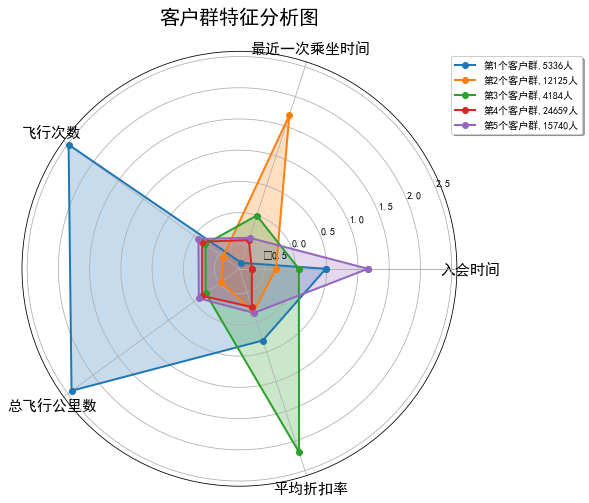

In [10]:
# 绘制雷达图
import matplotlib.pyplot as plt
%matplotlib inline

rmax = r3.values.max()
rmin = r3.values.min()
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111,polar = True)
center_num = r.values
feature = [u'入会时间',u'最近一次乘坐时间',u'飞行次数',u'总飞行公里数',u'平均折扣率']
N = len(feature)
for i,v in enumerate(center_num):
    angles = np.linspace(0,2*np.pi,N,endpoint = False)
    center = np.concatenate((v[:-1],[v[0]]))
    angles = np.concatenate((angles,[angles[0]]))
    ax.plot(angles,center,'o-',linewidth = 2,label = '第%d个客户群,%d人'%(i+1,v[-1]))
    ax.fill(angles,center,alpha = 0.25)
    ax.set_thetagrids(angles * 180/np.pi, feature, fontsize=15)
    ax.set_ylim(rmin - 0.1,rmax + 0.1)
    plt.title(u'客户群特征分析图',fontsize = 20)
    ax.grid(True)
    plt.legend(loc = 'upper right',bbox_to_anchor = (1.3,1.0),ncol = 1,fancybox = True,shadow = True)
    
plt.show()

#### 2.6.2 客户价值分析

（1）重要保持客户 - 客户群1

　　这类客户的平均折扣率(C)较高(一般所乘航班的舱位的等级较高)，最近乘坐过本公司航班(R)低，乘坐的次数(F)或里程(M)较高。他们是公司的高价值客户，是最理想的客户类型，对航空公司的贡献率大，但是所占的比例较小。  
　　航空公司应当优先将资源投放在他们身上，对他们做到一对一精准营销，比如提供相应的优惠政策，提高这类客户的忠诚度和满意度，尽可能延长这类客户的高消费水平。

（2）重要发展客户 - 客户群5

　　这类客户的平均折扣率(C)较高，最近乘坐过本公司航班(R)低，乘坐的次数(F)或里程(M)较低。这类客户入会时长(L)短，他们是公司的潜在价值客户。  
　　航空公司在运营过程中也要相应加大对这部分客户的投入，比如以短信和邮件的方式询问客户是否满意、提供适当的优惠服务等，加强这类客户的满意度，使他们逐渐成为公司的忠实客户。

（3）重要挽留客户 - 客户群2

　　这类客户的平均折扣率(C)、乘坐的次数(F)或里程(M)较高，但是已经较长时间已经没有乘坐过本公司航班，即(R)较高或者乘坐的频率变小，他们是公司的重要挽留客户。  
　　航空公司在运营过程中要积极推测这类客户的异常情况，进行竞争分析，观察其他航空公司有什么营销策略，然后采取有针对性的营销手段，延长客户的生命周期。

（4）一般和低价值客户 - 客户群3、4

　　这类客户的平均折扣率(C)较低，最近乘坐过本公司航班(R)低，乘坐的次数(F)或里程(M)较低。入会时长(L)也较短，因此可能只是在机票打折的时候才会乘坐本航班。

　　重要发展客户、重要保持客户、重要挽留客户可以称作为客户生命周期管理中的发展期、稳定期、衰退期三个阶段。

#### The End